<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Hockey-Teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 19.2 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [6]:
# Navigate to a web page.
browser.get('https://www.scrapethissite.com/pages/forms/')

In [7]:
# Print the page source code.
print(browser.page_source)

<html lang="en"><head>
    <meta charset="utf-8">
    <title>Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping</title>
    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="description" content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components.">

    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">
    <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css">
    <link rel="stylesheet" type="text/css" href="/static/css/styles.css">

    
<meta name="robots"

In [10]:
# Select an element from the page.
element = browser.find_element(By.TAG_NAME, 'a')

In [11]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

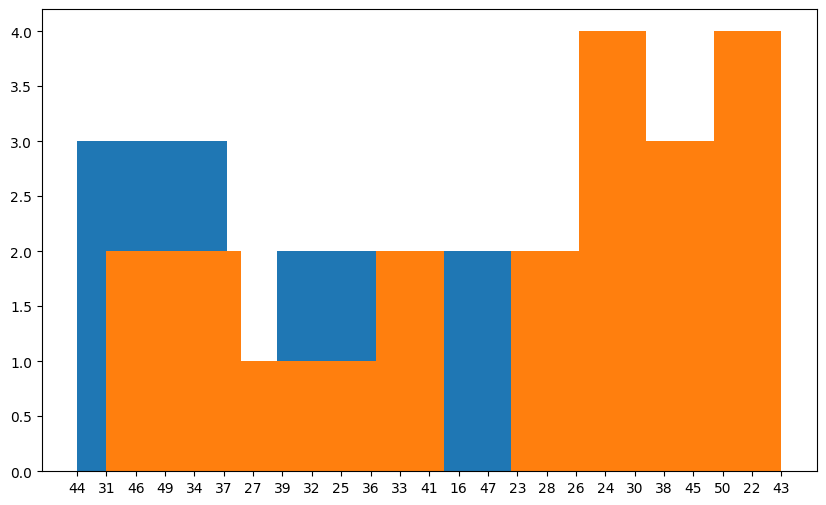

In [13]:
# Write your code here.
teams = browser.find_elements(By.CLASS_NAME,"team")
matrix = []
for team in teams:
    team_name = team.find_element(By.CLASS_NAME,"name").text
    team_wins = team.find_element(By.CLASS_NAME,"wins").text
    team_losses = team.find_element(By.CLASS_NAME,"losses").text
    team_year = int(team.find_element(By.CLASS_NAME,"year").text)
    matrix.append([team_name, team_wins, team_losses,team_year])

#25 timovi minimum
df = pd.DataFrame(matrix,columns=['Team Name','Team Wins','Team Losses','Team Year'])
#print(df)
#histogram za tie shto se 1990 godina
filtered_data = df[df['Team Year'] == 1990]

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10,6))
plt.hist(filtered_data['Team Wins'],bins=10)
plt.hist(filtered_data['Team Losses'],bins=10)
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

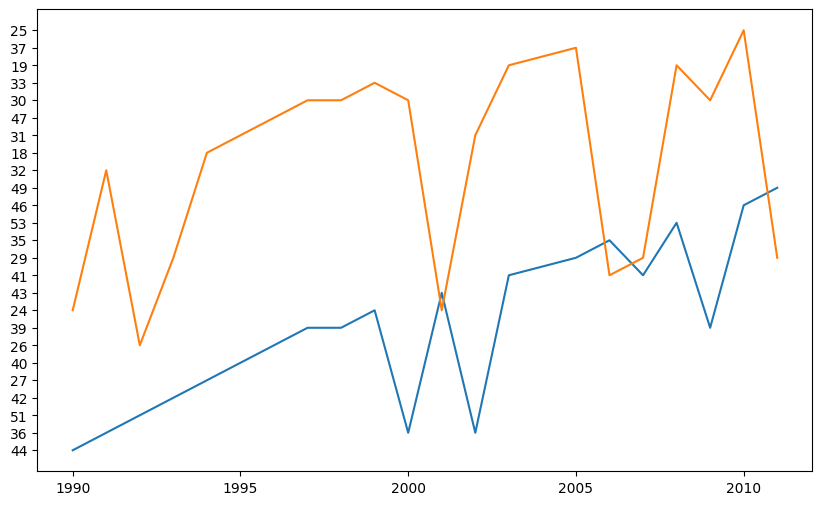

In [15]:
# Write your code here.
# Add as many code boxes as you need.
browser = webdriver.Chrome(options=options)
browser.get('https://www.scrapethissite.com/pages/forms/')# Write your code here.
boston=[]
search = browser.find_element(By.ID,'q')
search.send_keys("Boston Bruins")
search.submit()
teams = browser.find_elements(By.CLASS_NAME,"team")
boston = []
for team in teams:
    team_name = team.find_element(By.CLASS_NAME,"name").text
    team_wins = team.find_element(By.CLASS_NAME,"wins").text
    team_losses = team.find_element(By.CLASS_NAME,"losses").text
    team_year = int(team.find_element(By.CLASS_NAME,"year").text)
    boston.append([team_name,team_wins,team_losses,team_year])

boston_df = pd.DataFrame(boston,columns=['Name','Wins','Losses','Year'])
plt.figure(figsize=(10,6))
plt.plot(boston_df['Year'],boston_df['Wins'])
plt.plot(boston_df['Year'],boston_df['Losses'])
plt.show()